# NSS Jaya Prakash

## Importing data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
# Specify the path to your CSV file
file_path = r"D:\JP CERTIFICATES\IITK\Course summerterm\finlatics\DsResearch\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv"
# Function to attempt reading the CSV file with different encodings
def read_csv_with_encodings(file_path):
    encodings = ['utf-8', 'ISO-8859-1', 'cp1252']
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"Successfully read the file with encoding: {encoding}")
            return df
        except UnicodeDecodeError:
            print(f"Failed to read the file with encoding: {encoding}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
    print("All attempts to read the file with different encodings have failed.")
    return None
df = read_csv_with_encodings(file_path)

Failed to read the file with encoding: utf-8
Successfully read the file with encoding: ISO-8859-1


## Data Cleaning

In [64]:
print(df.shape)

(1006, 29)


In [65]:
# delete dummies
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())

     rank                                           Youtuber subscribers  \
995    12                                                WWE    96000000   
996    13                                             Gaming    93600000   
997    39  LooLoo Kids - Nursery Rhymes and Children's Songs    54000000   
998    40                                         Ed Sheeran    53500000   
999    41                                  Infobells - Hindi    53300000   

      video views   category                                            Title  \
995  7.742847e+10     Sports                                              WWE   
996  0.000000e+00        NaN                                           Gaming   
997  3.231243e+10      Music  LooLoo Kids - Nursery Rhymes and Children's ï¿½   
998  3.036768e+10      Music                                       Ed Sheeran   
999  3.051617e+10  Education                                Infobells - Hindi   

     uploads Country of origin         Country Abbreviat

In [66]:
# drop duplicate rows
df.drop_duplicates(inplace = True)

In [67]:
print(df.dtypes)

rank                                         int64
Youtuber                                    object
subscribers                                 object
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country of origin                           object
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days   

In [68]:
# subscribers cahnnel
# change subscribers dtype to int64
df['subscribers'] = pd.to_numeric(df['subscribers'], errors = 'coerce')

# drop or fill subscribers Nan values
df.dropna(subset = ['subscribers'], inplace = True)

In [69]:
# categroy
# value_counts in category
print(df['category'].value_counts())
# fill nan rows of category with rows of channel type
df['category'].fillna(df['channel_type'], inplace = True)
# drop the remaining 4 nan value rows in category
df.dropna(subset = ['category'], inplace = True)

category
Entertainment            237
Music                    201
People & Blogs           130
Gaming                    93
Comedy                    69
Education                 45
Film & Animation          44
Howto & Style             39
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64


In [70]:
# country
print(df['Country of origin'].value_counts())
print(df['Country'].value_counts())
# both are same, so drop country of origin
df.drop(columns = ['Country of origin'], inplace = True)

Country of origin
United States           313
India                   165
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    21
Thailand                 18
South Korea              17
Russia                   16
Canada                   14
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru                      1
An

In [71]:
# fill Nan rows with text unknown
df['Country'] = df['Country'].fillna(df['Country'].mode().iat[0])
df['Abbreviation'].fillna('UN', inplace = True)

In [72]:
# channel type
# fill nan rows of channel type with rows of category
df['channel_type'].fillna(df['category'], inplace = True)

In [73]:
# video_views_rank
# drop the single nan value
df.dropna(subset = ['video_views_rank'], inplace = True)

In [74]:
# country_rank
df['country_rank'].fillna(0, inplace=True)

In [75]:
# country_type_rank
df['channel_type_rank'].fillna(0, inplace=True)

In [76]:
# video_views_for_the_last_30_days
df['video_views_for_the_last_30_days'].fillna(0, inplace=True)

In [77]:
# subscribers_for_last_30_days
df['subscribers_for_last_30_days'].fillna(0, inplace=True)

In [78]:
# drop the nan values in created_year column
df.dropna(subset = ['created_year'], inplace = True)

In [79]:
# find mode of the created_month column
df['created_month'] = df['created_month'].fillna(df['created_month'].mode().iat[0])

In [80]:
# Gross tertiary education enrollment column fill nan values with mean
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].fillna(df['Gross tertiary education enrollment (%)'].mean())

In [81]:
# Population column fill nan values with mean
df['Population'] = df['Population'].fillna(df['Population'].mean())

In [82]:
# Unemployment column fill nan values with mean
df['Unemployment rate'] = df['Unemployment rate'].fillna(df['Unemployment rate'].mean())

In [83]:
# urban population column fill nan values with median
df['Urban_population'] = df['Urban_population'].fillna(df['Urban_population'].median())

In [84]:
# impute values with mean coordinates from the same country
df['Longitude'] = df.groupby('Country')['Longitude'].transform(lambda x: x.fillna(x.mean()))
df['Latitude'] = df.groupby('Country')['Latitude'].transform(lambda x: x.fillna(x.mean()))

In [85]:
# since Andorra have Nan values, drop the row
# df.drop(subset = '')
print(df.loc[663])
df.drop(index=663, inplace=True)

rank                                                    664
Youtuber                                              Musas
subscribers                                      15100000.0
video views                                    2400037562.0
category                                      Howto & Style
Title                                            Jordi Sala
uploads                                                 159
Country                                             Andorra
Abbreviation                                             AD
channel_type                                         People
video_views_rank                                  3889418.0
country_rank                                          504.0
channel_type_rank                                    7615.0
video_views_for_the_last_30_days                       86.0
lowest_monthly_earnings                                0.02
highest_monthly_earnings                               0.34
lowest_yearly_earnings                  

In [86]:
# checking null values
print(df.isnull().sum())

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

## Questions

In [87]:
# 1.What are the top 10 YouTube channels based on the number of subscribers?
df0 = df.sort_values(by = 'subscribers', ascending = False)
df0['Youtuber'].head(10)

0                      T-Series
1                YouTube Movies
2                       MrBeast
3    Cocomelon - Nursery Rhymes
4                     SET India
5                         Music
6           ýýý Kids Diana Show
7                     PewDiePie
8                   Like Nastya
9                 Vlad and Niki
Name: Youtuber, dtype: object

In [88]:
# 2.Which category has the highest average number of subscribers?
mean_subscribers = df.groupby('category')['subscribers'].mean()

# Get the category with the highest mean subscribers
highest_subscribers_category = mean_subscribers.idxmax()
highest_subscribers_mean = mean_subscribers.max()
print(f'{highest_subscribers_category}: ',highest_subscribers_mean)

Shows:  41615384.615384616


In [89]:
# 3. How many videos, on average, are uploaded by YouTube channels in each category?
df1 = df.groupby('category')['uploads'].mean()
print(df1)
channel_videos_upload = df1.idxmax()
highest_videos_upload = df1.max()
print(f'{channel_videos_upload}: ', highest_videos_upload)

category
Autos & Vehicles           1898.500000
Comedy                     1119.753623
Education                  2896.775510
Entertainment             11410.698413
Film                        518.000000
Film & Animation           2899.340909
Games                      1043.500000
Gaming                     4272.195652
Howto                       335.000000
Howto & Style              1741.368421
Movies                     3553.000000
Music                      2309.878049
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People                     2033.666667
People & Blogs             9396.751938
Pets & Animals             4451.500000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    13341.500000
Tech                        514.000000
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64
News & Politics:  112484.38461538461


In [90]:
# 4.What are the top 5 countries with the highest number of YouTube channels?
df2 = df.groupby('Country')['Youtuber'].count()
top_5 = df2.sort_values(ascending = False).head(5)
print(f'Top 5 countries with the highest number of YouTube channels : ', top_5)

Top 5 countries with the highest number of YouTube channels :  Country
United States     429
India             164
Brazil             61
United Kingdom     43
Mexico             33
Name: Youtuber, dtype: int64


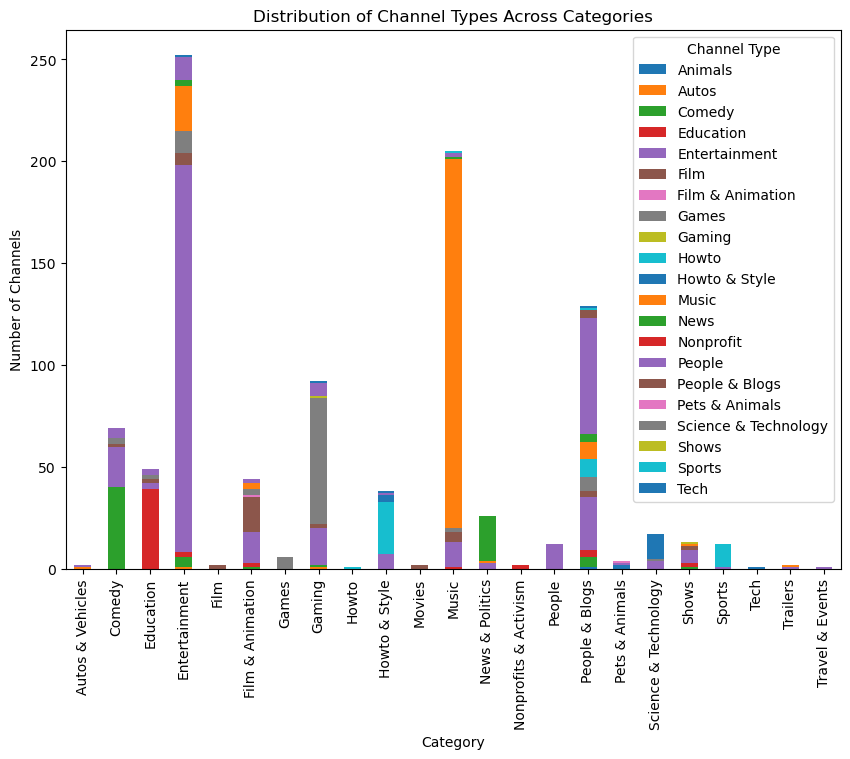

In [91]:
# 5.What is the distribution of channel types across different categories?
channel_type_distribution = pd.crosstab(df['category'], df['channel_type'])
channel_type_distribution.plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Distribution of Channel Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.legend(title = 'Channel Type')
plt.show()

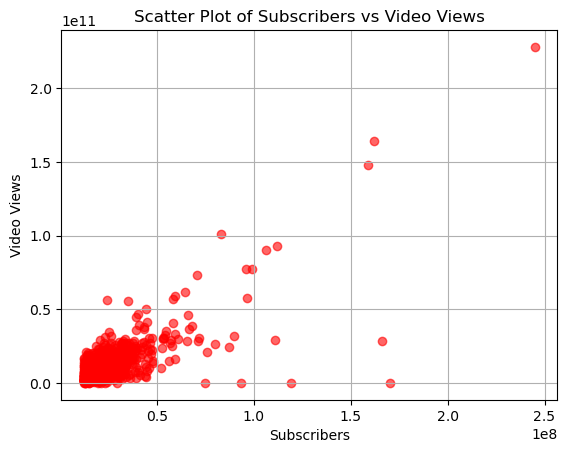

In [92]:
# 6. Is there a correlation between the number of subscribers and total video views for YouTube channels?
df[['subscribers', 'video views']].corr(method = 'pearson')
plt.scatter(data = df, x = 'subscribers', y = 'video views', alpha = 0.6, color = 'red')
plt.title('Scatter Plot of Subscribers vs Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.grid(True)

                       lowest_monthly_earnings  highest_monthly_earnings
category                                                                
Autos & Vehicles                  68300.000000              1.086350e+06
Comedy                            41867.536232              6.683122e+05
Education                         43006.306327              6.890633e+05
Entertainment                     38872.644444              6.208808e+05
Film                               4700.000000              7.530000e+04
Film & Animation                  47325.318409              7.573542e+05
Games                             65486.166667              1.055511e+06
Gaming                            17101.631304              2.742229e+05
Howto                              9300.000000              1.487000e+05
Howto & Style                     12370.894737              1.976122e+05
Movies                            28400.000000              4.547000e+05
Music                             34938.314195     

<Axes: xlabel='category'>

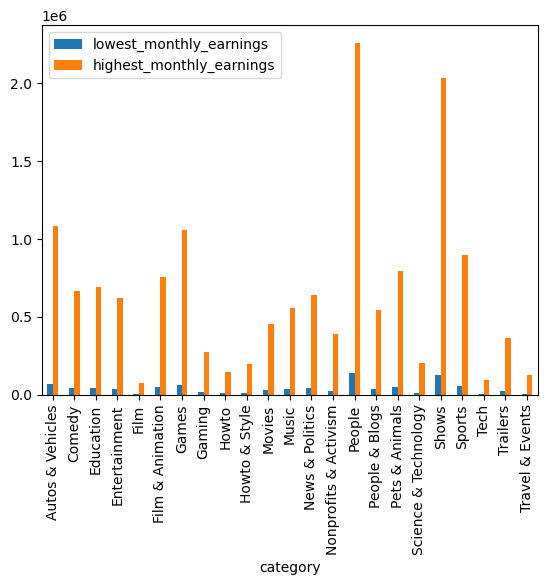

In [93]:
# 7. How do the monthly earnings vary throughout different categories?
df3 = df.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()
print(df3)
df3.plot(kind = 'bar')

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


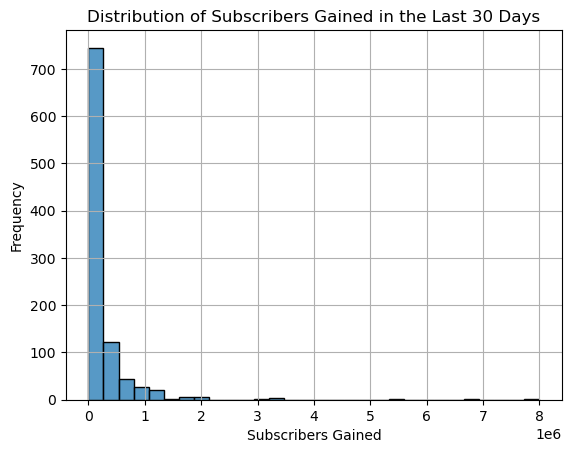

In [94]:
# 8. What is the overall trend in subscribers gained in the last 30 days across all channels?
sns.histplot(data = df, x = df['subscribers_for_last_30_days'], bins = 30)
plt.title('Distribution of Subscribers Gained in the Last 30 Days')
plt.xlabel('Subscribers Gained')
plt.ylabel('Frequency')
plt.grid(True)


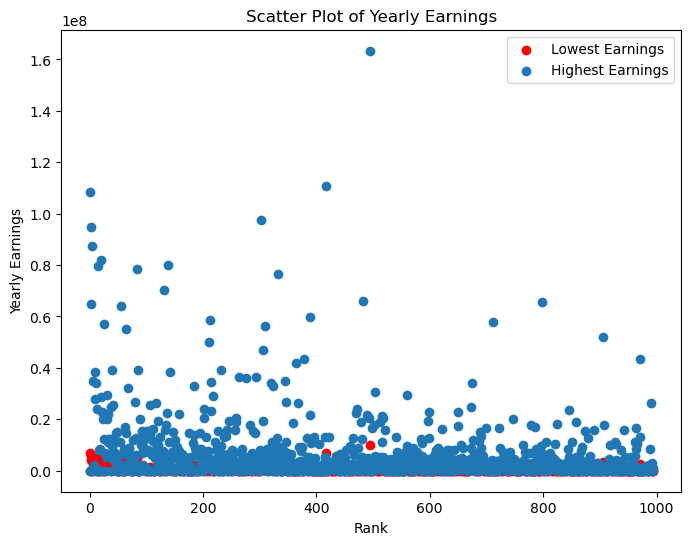

In [95]:
# 9. Are there any outliers in terms of yearly earnings from YouTube channels?
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['lowest_yearly_earnings'], label='Lowest Earnings', color = 'red')
plt.scatter(df.index, df['highest_yearly_earnings'], label='Highest Earnings')
plt.title('Scatter Plot of Yearly Earnings')
plt.xlabel('Rank')
plt.ylabel('Yearly Earnings')
plt.legend()


created_year
1970.0     1
2005.0    24
2006.0    90
2007.0    49
2008.0    46
2009.0    52
2010.0    48
2011.0    82
2012.0    66
2013.0    75
2014.0    98
2015.0    71
2016.0    77
2017.0    68
2018.0    45
2019.0    33
2020.0    30
2021.0    21
2022.0     5
Name: Youtuber, dtype: int64


Text(0.5, 1.0, 'Distribution of channels over time')

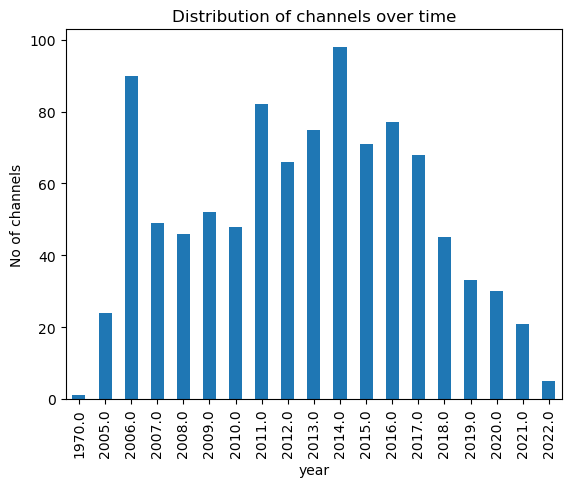

In [96]:
# 10. What is the distribution of channel creation dates? Is there any trend over time?
df5 = df.groupby('created_year')['Youtuber'].count()
print(df5)
df5.plot(kind = 'bar')
plt.xlabel('year')
plt.ylabel('No of channels')
plt.title('Distribution of channels over time')

The correlation observed between gross tertiary education enrollment is: 0.10030736370392289 which shows weak positive correlation.


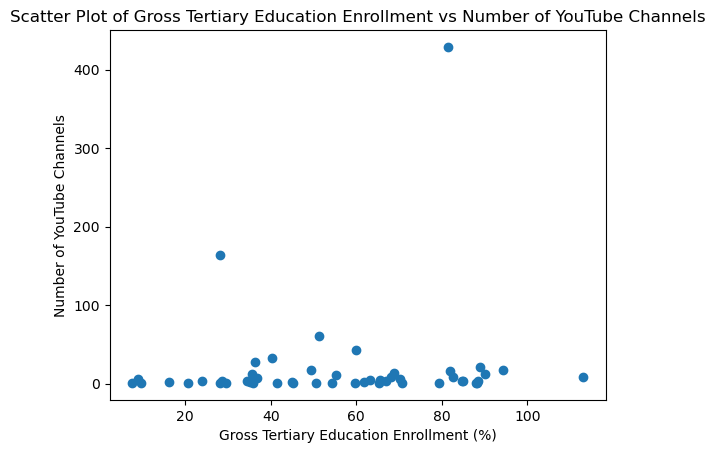

In [97]:
# 11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?
df6 = df.groupby('Country')['Gross tertiary education enrollment (%)'].mean()
df7 = df.groupby('Country')['Youtuber'].count()
correlation = df6.corr(df7)
print(f'The correlation observed between gross tertiary education enrollment is: {correlation} which shows weak positive correlation.')
# plot
plt.scatter(df6, df7)
plt.title('Scatter Plot of Gross Tertiary Education Enrollment vs Number of YouTube Channels')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.show()





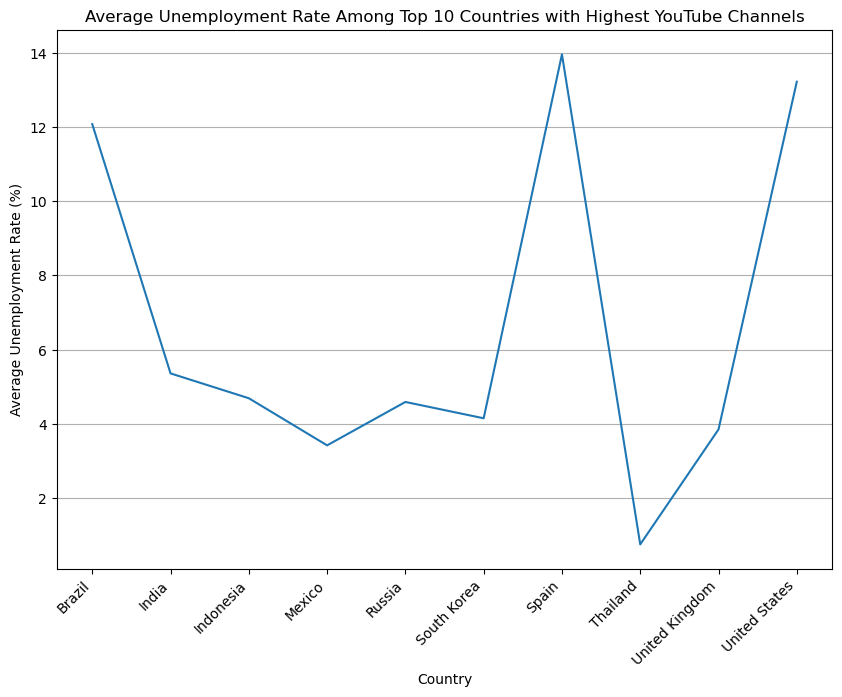

In [98]:
# 12. How does the unemployment rate vary among the top 10 countries with highest number of YouTube channels?
channels_by_country = df['Country'].value_counts()
top_10 = channels_by_country.head(10)
top_10 = top_10.index
top_10

# filtering unemployment rates for top 10 countries
top_10_unemp_rates = df[df['Country'].isin((top_10))]
# calculating avg unemloyement rates for each country of top 10
avg_unemp_rates = top_10_unemp_rates.groupby('Country')['Unemployment rate'].mean()
avg_unemp_rates.index
#avg_unemp_rates.value

plt.figure(figsize = (10,7))
plt.plot(avg_unemp_rates.index, avg_unemp_rates.values)
plt.title('Average Unemployment Rate Among Top 10 Countries with Highest YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

In [99]:
# 13. What is the average urban population in countries with YouTube channels?
df9 = df.groupby('Country')['Urban_population'].mean()
df10 = df['Urban_population'].mean()
print('The average urban population in countries with YouTube channels is: ',int(df10))

The average urban population in countries with YouTube channels is:  229587806


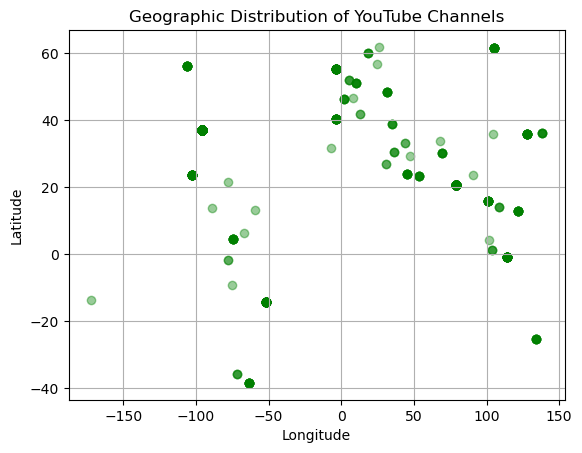

In [100]:
# 14. Are there any patterns in distribution of YouTube channels based on latitude and longitude coordinates?
plt.scatter(df['Longitude'], df['Latitude'], alpha = 0.4, color = 'green')
plt.title('Geographic Distribution of YouTube Channels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [101]:
# 15. What is the correlation between the number of subscribers and the population of a country?
df_ = df[['subscribers', 'Population']].corr(method = 'pearson')
print(df_)
print('There is almost no correlation between the number of subscribers and the population of a country')

             subscribers  Population
subscribers     1.000000    0.081251
Population      0.081251    1.000000
There is almost no correlation between the number of subscribers and the population of a country


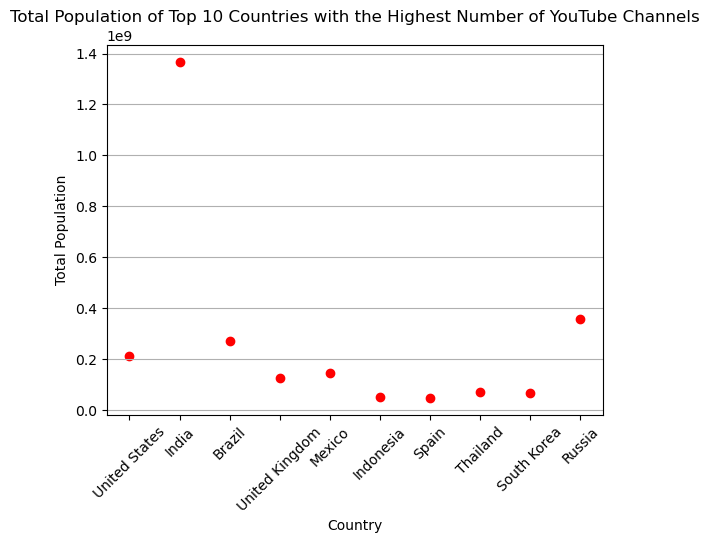

In [102]:
# 16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

# filtering population for top 10 countries
top_10_population = df[df['Country'].isin((top_10))]
avg_pop_top_10 = top_10_population.groupby('Country')['Population'].mean()
plt.scatter(top_10, avg_pop_top_10, color='red')
plt.title('Total Population of Top 10 Countries with the Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [103]:
# 17.Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?
print(df[['subscribers_for_last_30_days', 'Unemployment rate']].corr(method = 'pearson'))
print('This implies that there is a weak negative correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country.')

                              subscribers_for_last_30_days  Unemployment rate
subscribers_for_last_30_days                      1.000000          -0.047312
Unemployment rate                                -0.047312           1.000000
This implies that there is a weak negative correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country.


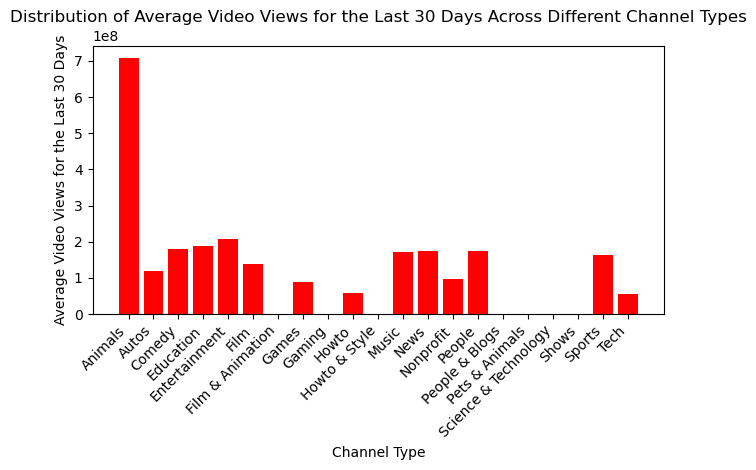

In [104]:
# 18. How does the distribution of video views for the last 30 days vary across different channel types?
df11 = df.groupby('channel_type')['video_views_for_the_last_30_days'].mean()
plt.bar(df11.index, df11.values, color = 'red')
plt.title('Distribution of Average Video Views for the Last 30 Days Across Different Channel Types')
plt.xlabel('Channel Type')
plt.ylabel('Average Video Views for the Last 30 Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


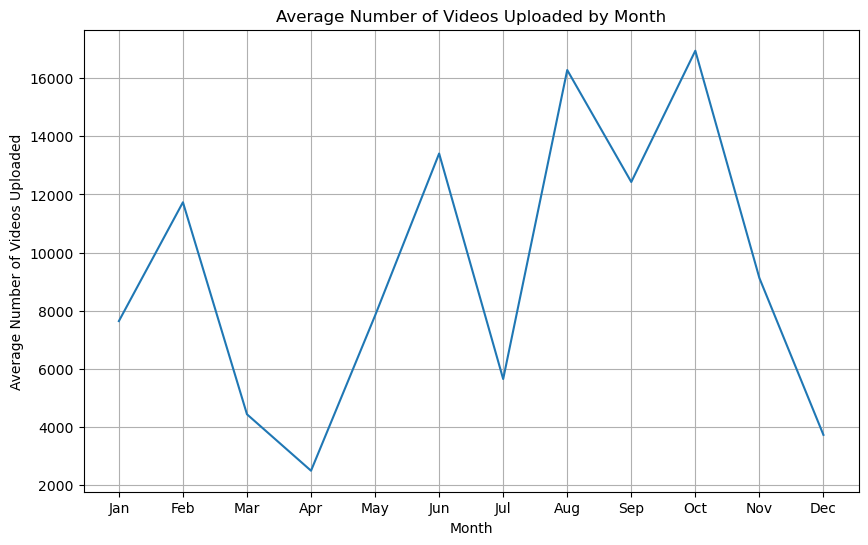

In [105]:
# 19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?

# Defining the order of months
categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
average_videos_by_month = df.groupby('created_month')['uploads'].mean()
# Converting the index to a categorical
average_videos_by_month.index = pd.Categorical(average_videos_by_month.index, categories = categories, ordered = True)
# Sorting the Series by the index
average_videos_by_month = average_videos_by_month.sort_index()
# Plotting the average number of videos uploaded for each month
plt.figure(figsize=(10, 6))
plt.plot(average_videos_by_month.index, average_videos_by_month.values)
plt.title('Average Number of Videos Uploaded by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [106]:
# 20. What is the average number of subscribers gained per month since the creation of YouTube channels till now?
# Converting the 'month_created' column to categorical data type
df['created_month'] = df['created_month'].astype('category')
# Converting the categorical month data to numerical codes and add 1 to avoid 0 indexing
df['created_month'] = df['created_month'].cat.codes + 1
# Converting the 'year_created' column to categorical data type
df['created_year'] = df['created_year'].astype('category')
# Converting the categorical year data to numerical codes and add 1 to avoid 0 indexing
df['created_year'] = df['created_year'].cat.codes + 1
# Calculating the total number of months since creation for each entry
df['months_since_creation'] = (df['created_year'] * 12) + df['created_month']
# Calculating the average number of subscribers gained per month
average_subscribers_per_month = df['subscribers'] / df['months_since_creation']
# Print the mean value of the calculated average subscribers per month
print(f"Average number of subscribers gained per month: {int(average_subscribers_per_month.mean())}")

Average number of subscribers gained per month: 65868


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     981 non-null    int64  
 1   Youtuber                                 981 non-null    object 
 2   subscribers                              981 non-null    float64
 3   video views                              981 non-null    float64
 4   category                                 981 non-null    object 
 5   Title                                    981 non-null    object 
 6   uploads                                  981 non-null    int64  
 7   Country                                  981 non-null    object 
 8   Abbreviation                             981 non-null    object 
 9   channel_type                             981 non-null    object 
 10  video_views_rank                         981 non-null  